In [13]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [15]:
# read in list of simulation cosmo parameters
table = Table.read('cosmological_parameters.txt', format='ascii')
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])

# PS5000 [2] vs. Peaks 2'[6]

(0, 9)

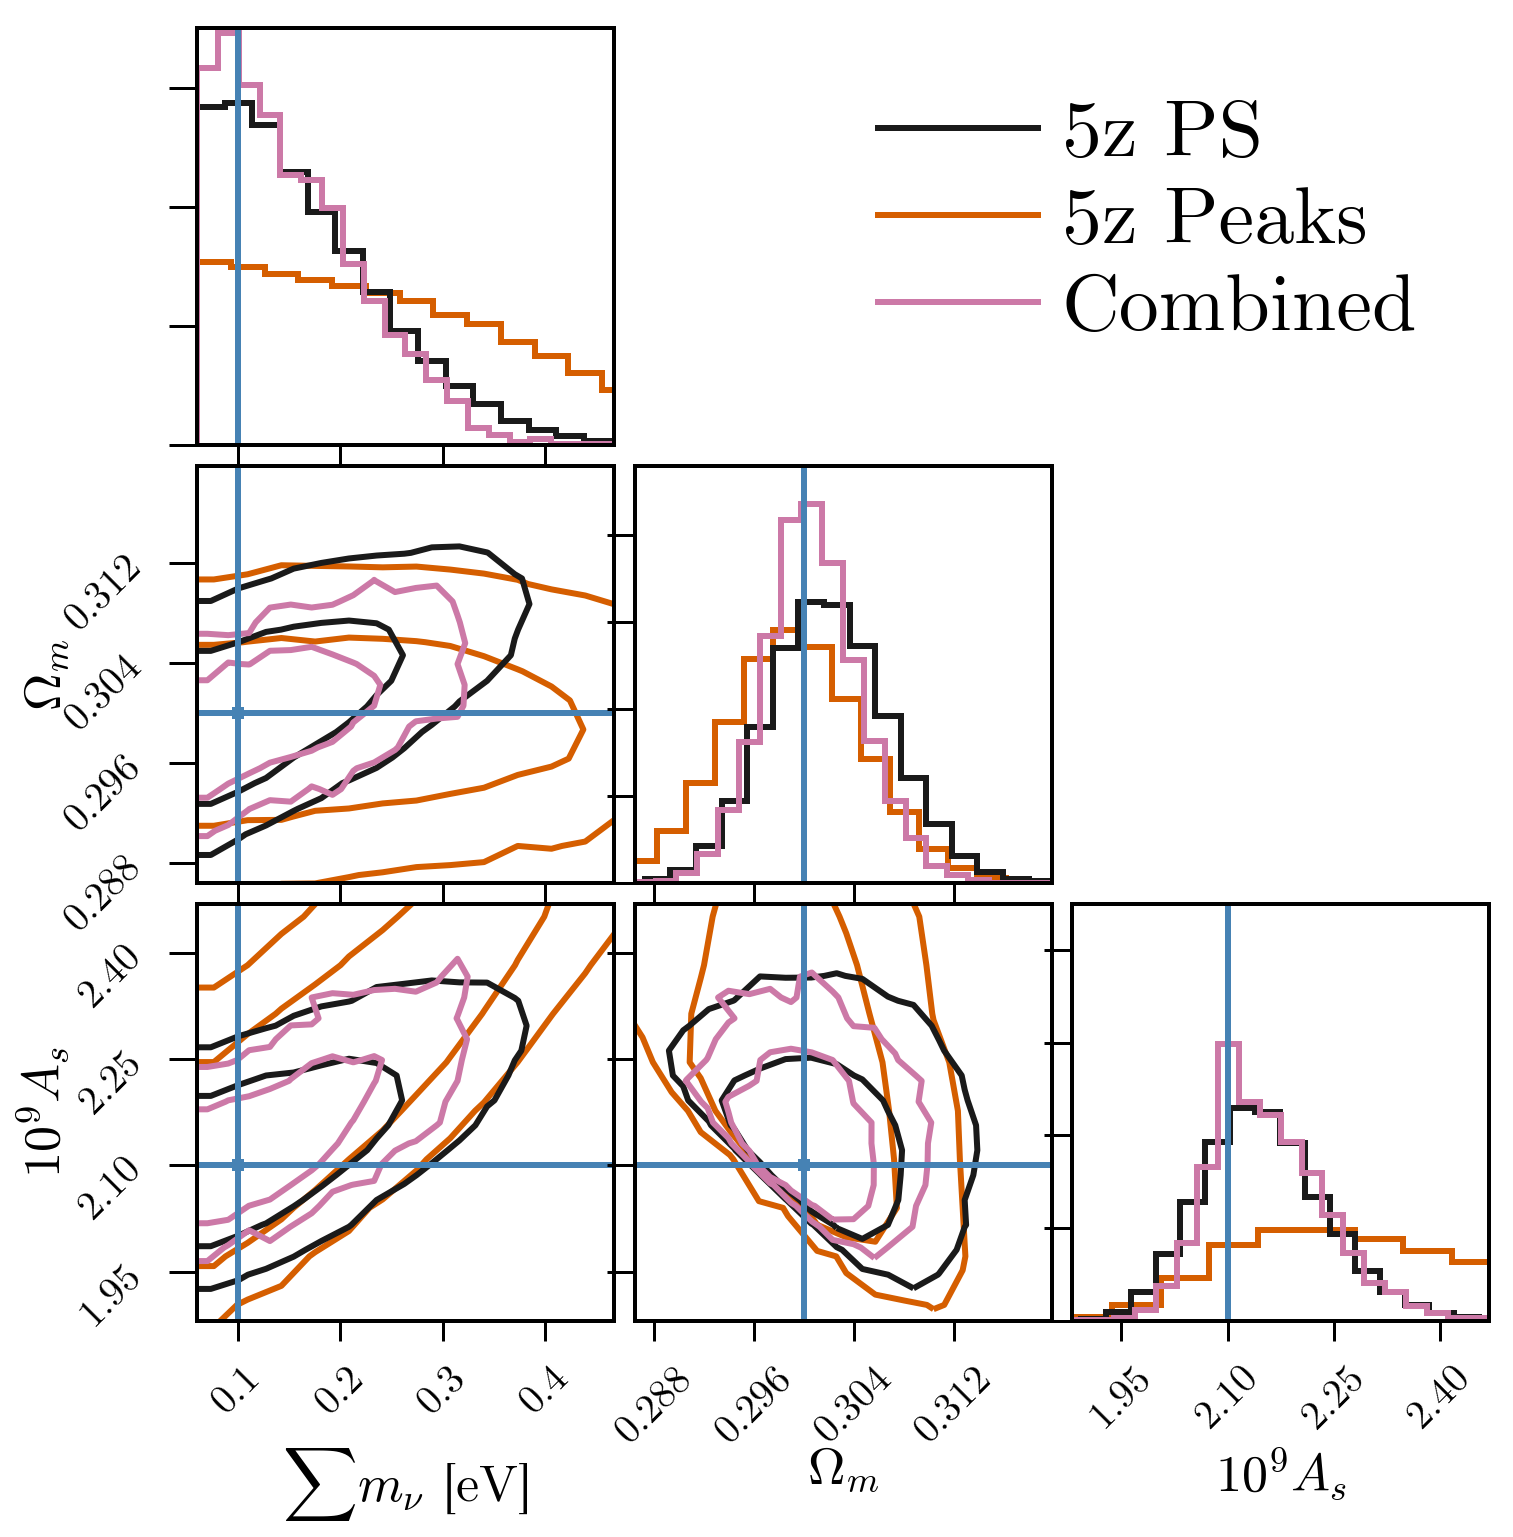

In [104]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("combo12.out")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[4])


axes[0,2].plot([],[],color=default_color_list[0], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[3], label='5z Peaks')
axes[0,2].plot([],[],color=default_color_list[4], label='Combined')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')

# 3 Smoothing Scales [5,6,7]

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/Peaks_5_19020341.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("chains/Peaks_7_19020343.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


axes[0,1].plot([],[],color=default_color_list[3], label='1 arcmin')
axes[0,1].plot([],[],color=default_color_list[0], label='2 arcmin')
axes[0,1].plot([],[],color=default_color_list[1], label='5 arcmin')

axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# Conjecture : some info at small scales

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(12,12))


chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_7_19020343.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


axes[0,1].plot([],[],color=default_color_list[3], label='PS 5000')
axes[0,1].plot([],[],color=default_color_list[1], label='Peaks 5 arcmin')

axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# Comparison of PS ngal40 and 5z

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/PS_4_19020349.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[0], label='ng40 PS')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')

# Peaks low / med / high

(0, 9)

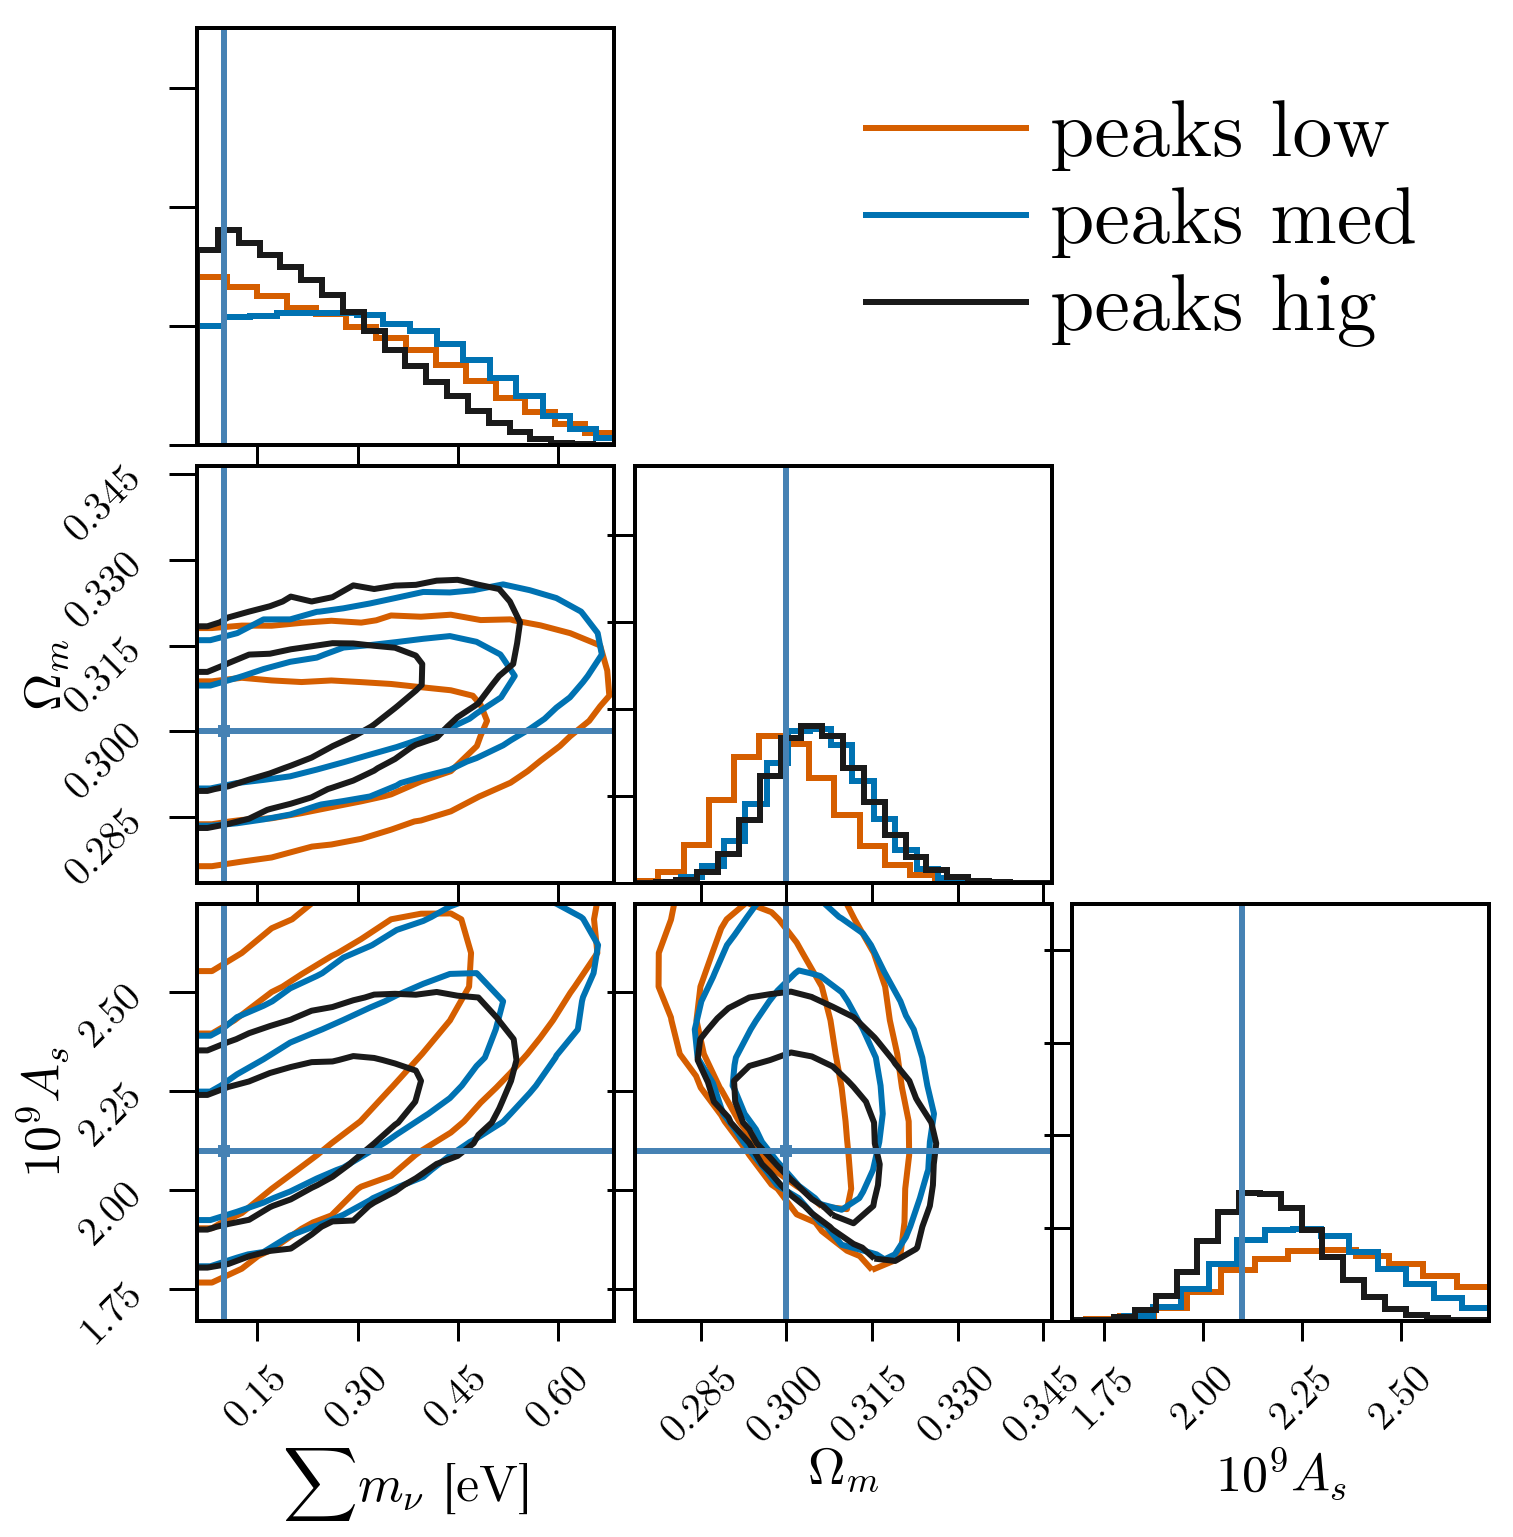

In [105]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/Peaks_8_low_19030882.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_9_med_19030883.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


chain = ascii.read("chains/Peaks_10_high_19030880.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='peaks low')
axes[0,2].plot([],[],color=default_color_list[1], label='peaks med')
axes[0,2].plot([],[],color=default_color_list[0], label='peaks hig')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')

# CMB Priors

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [155]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'sum_mnu'])
centers = np.array([0.02254,  0.1234,  0.7,  2.1e-9, 0.97, 0.06, 0.1])
left_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl mPk',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'halofit',
                 'reionization_optical_depth_tol': 1e-07,
                 'tol_background_integration': 1e-8,
                 'tol_perturb_integration': 1e-8,
                 'tol_thermo_integration': 1e-8,
              
                 'perturb_sampling_stepsize':0.01,
                 'k_max_tau0_over_l_max' : 6,
                   
                  'P_k_max_1/Mpc':3.0
                  }
# classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [156]:
# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

In [157]:
c = obs.cosmos['CLASS_fiducial']
c.Omega0_m()

0.3000281903167247

In [ ]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left',
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    obs.compute_cosmo(key=par + '_CLASS_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))

In [ ]:

pars = np.array( ['omega_b', 'Omega_m', 'h',  'A_s', 'n_s', 'tau_reio', 'sum_mnu'])
fid_Om = obs.cosmos['CLASS_fiducial'].Omega0_m()
centers = np.array([0.02254,  fid_Om,  0.7,  2.1e-9, 0.97, 0.06, 0.1])
left_steps = np.array([0.0008, abs(fid_Om-
                           obs.cosmos['omega_cdm_CLASS_left'].Omega0_m()),   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008,abs(fid_Om-
                           obs.cosmos['omega_cdm_CLASS_right'].Omega0_m()),   0.02,   0.1e-9, 0.01, 0.02, 0.02])

obs.parameters = pars
obs.fiducial = centers
obs.left = centers - left_steps
obs.right = centers + right_steps

obs.cosmos['Omega_m_CLASS_left'] = obs.cosmos['omega_cdm_CLASS_left']
obs.cosmos['Omega_m_CLASS_right'] = obs.cosmos['omega_cdm_CLASS_right']

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{Omega\\_m}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sum\\_mnu}$']


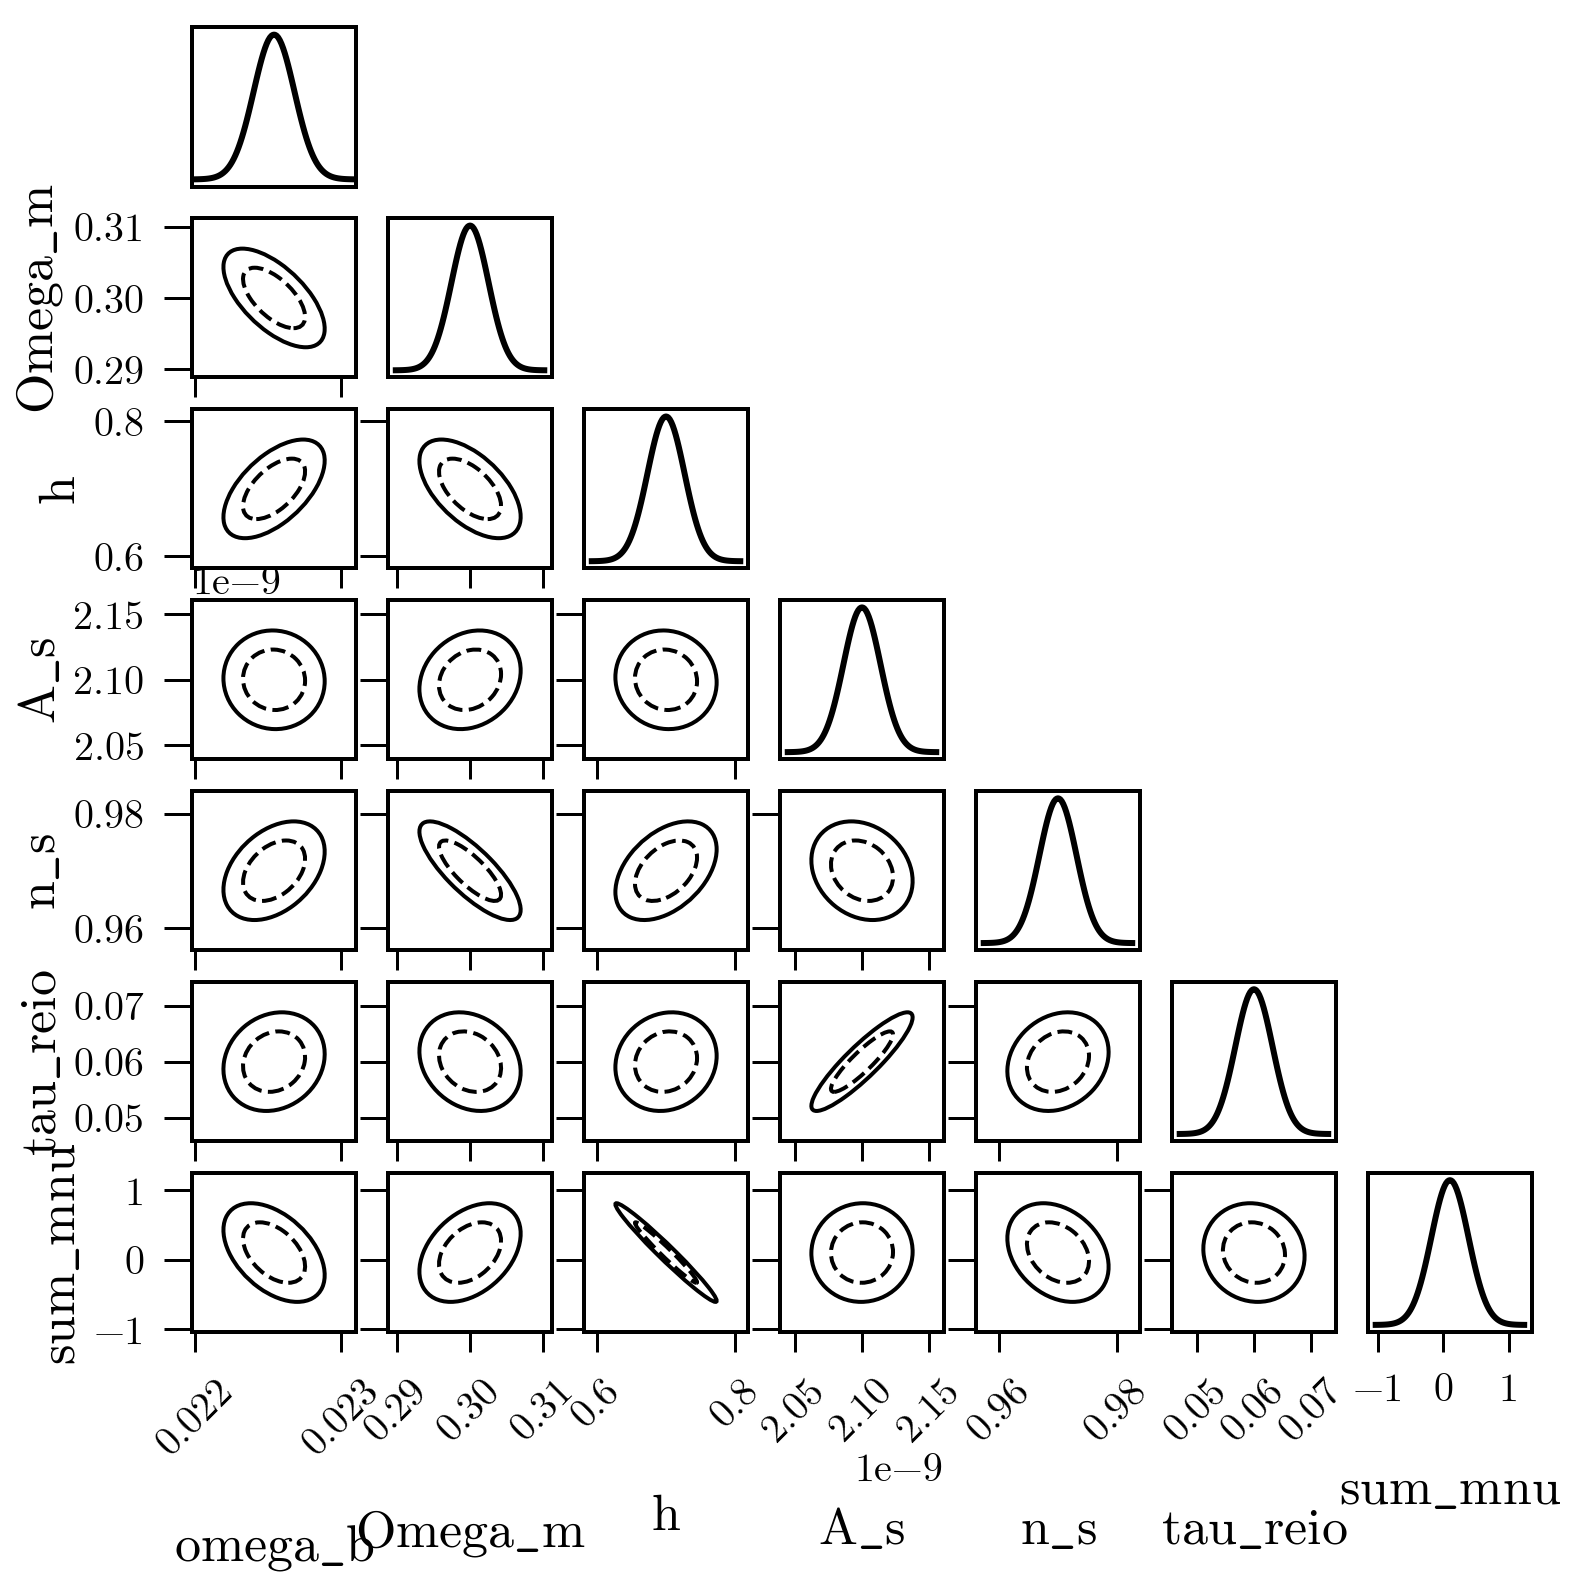

In [162]:

example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.75, l_min=2, l_max=2500)

fisher = example_Planck.get_fisher(obs)
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);

In [163]:
np.sqrt( cov[-1,-1])

0.28437649581954705

In [71]:
import corner

def unitize_cov(imp_cov, scales):
    imp_cov = imp_cov.copy()
    npar = imp_cov.shape[0]
    for i in range(npar):
        for j in range(npar):
            imp_cov[i,j] *= scales[i] * scales[j]
    return imp_cov

def get_samps(inp_cov, inp_means, num=int(1e8)):
    """
    Generate samples from a covariance matrix and input means.
    
    Parameters
    ----------
        inp_cov (2D numpy array) : covariance matrix from Fisher
        inp_means (1D numpy array) : mean values (mu), fiducial from Fisher
        
    Returns
    -------
        2D numpy array with each row corresponding to one random draw 
        from the multivariate Gaussian
    """
    samps = np.random.multivariate_normal( np.array(inp_means)/np.sqrt(np.diag(inp_cov)), 
                                           unitize_cov(inp_cov,1./np.sqrt(np.diag(inp_cov))), int(1e7))
    samps = samps[samps.T[-1]>0]
    for i in range(inp_cov.shape[0]):
        samps.T[i] *= np.sqrt(inp_cov[i,i])
        
    return samps

In [164]:
samps = get_samps(cov, centers)

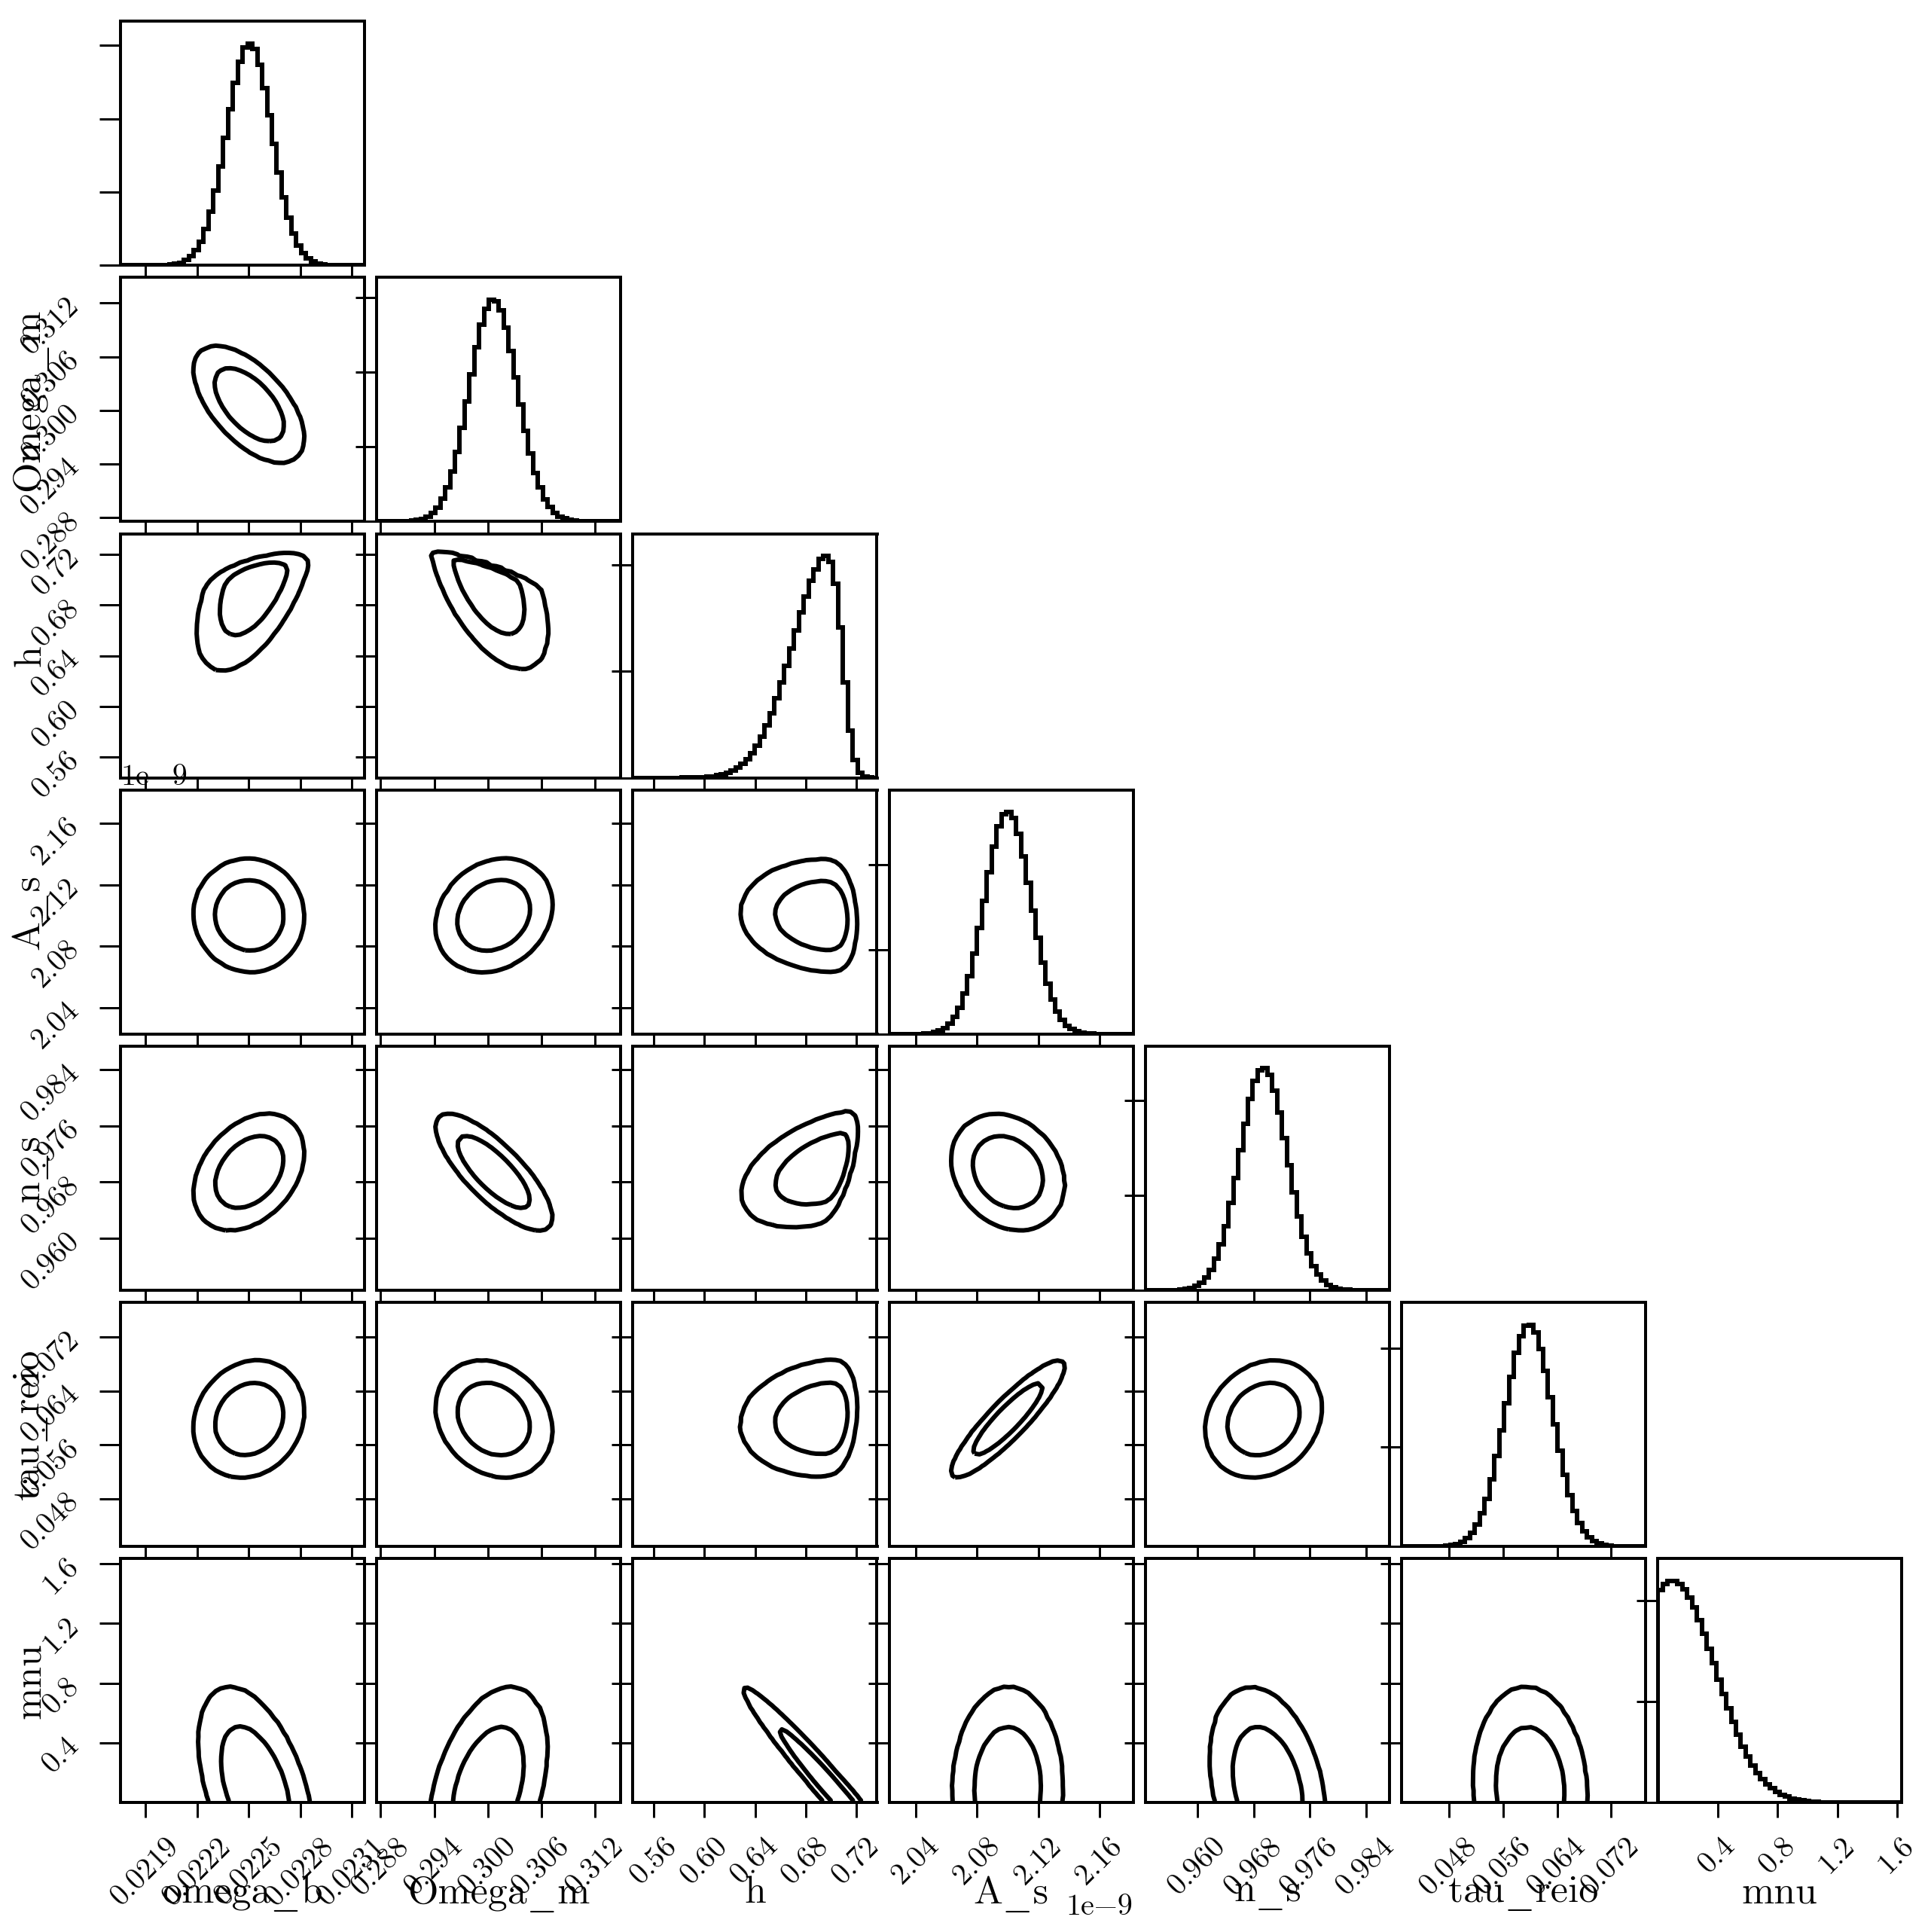

In [165]:
npar = cov.shape[0]
fig, ax = plt.subplots(npar, npar, figsize=(18,18))

corner.corner(samps,
              plot_datapoints=False, plot_density=False, bins=50, 
              levels=(0.68,0.95), lw=2, fig=fig,
              hist_kwargs={'density':True}, labels=[r'omega_b', r'Omega_m', r'h',  r'A_s', r'n_s', r'tau_reio', 'mnu']);